In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import seaborn as sns

In [2]:
f=h5py.File(r'features_database_gait_one_cycles_both_legs.h5', 'r')
print(list(f.keys()))
x = f['right'][:,:,:]
y = f['left'][:,:,:]
print('(samples, timesteps, features)', x.shape)
print('(samples, timesteps, features)', y.shape)

['left', 'right']
(samples, timesteps, features) (56, 132, 7)
(samples, timesteps, features) (59, 132, 7)


In [3]:
nsamples_r, nx_r, ny_r = x.shape
d2_x_r = x.reshape((nsamples_r,nx_r*ny_r))

nsamples_l, nx_l, ny_l = y.shape
d2_x_l = y.reshape((nsamples_l,nx_l*ny_l))

In [4]:
from sklearn.preprocessing import StandardScaler

scaler_r = StandardScaler()
scaler_r.fit(d2_x_r)
scaled_data_r = scaler_r.transform(d2_x_r)

scaler_l = StandardScaler()
scaler_l.fit(d2_x_l)
scaled_data_l = scaler_l.transform(d2_x_l)

In [5]:
scaled_data_r, scaled_data_l

(array([[-0.78587596, -0.82317414, -0.57757494, ...,  0.17063314,
         -1.53469349, -0.02270415],
        [-1.18446787, -0.52566653, -0.33943407, ..., -0.18203577,
         -0.72926615, -1.4792172 ],
        [-0.71469326, -0.81458604, -0.65046515, ..., -0.33951045,
          0.31651781, -0.22409644],
        ...,
        [ 0.65413661, -0.9052287 , -0.74884184, ..., -0.50387479,
          0.1772907 , -0.47810273],
        [ 1.30308212, -0.97879991, -1.14980435, ...,  0.77758619,
          1.17631905,  1.30447965],
        [ 1.30308212, -0.97879991, -1.14980435, ...,  0.77758619,
          1.17631905,  1.30447965]]),
 array([[-1.32283176, -0.43671766, -0.46653458, ..., -0.81910225,
          1.12789361, -0.47227018],
        [-0.58767064, -0.42138662, -0.96171919, ..., -0.9567227 ,
          0.16060759, -0.97337339],
        [-0.53229711, -0.13686319, -0.96844067, ..., -0.75117066,
         -0.66517064,  0.36098599],
        ...,
        [ 0.22657683, -0.77215567, -1.21333598, ..., -

In [6]:
scaled_data_r[:] = np.nan_to_num(scaled_data_r)
scaled_data_r

scaled_data_l[:] = np.nan_to_num(scaled_data_l)
scaled_data_l

array([[-1.32283176, -0.43671766, -0.46653458, ..., -0.81910225,
         1.12789361, -0.47227018],
       [-0.58767064, -0.42138662, -0.96171919, ..., -0.9567227 ,
         0.16060759, -0.97337339],
       [-0.53229711, -0.13686319, -0.96844067, ..., -0.75117066,
        -0.66517064,  0.36098599],
       ...,
       [ 0.22657683, -0.77215567, -1.21333598, ..., -0.24957218,
        -0.56889006,  0.20718092],
       [ 1.49750167, -1.28193657, -0.82274152, ...,  1.18202377,
        -0.2625394 , -0.28116394],
       [ 1.49750167, -1.28193657, -0.82274152, ...,  1.18202377,
        -0.2625394 , -0.28116394]])

In [7]:
from sklearn.decomposition import PCA

components = min(56, 7)
pca_r = PCA(n_components=components, svd_solver='full')
pca_r.fit(scaled_data_r)
x_pca_r = pca_r.transform(scaled_data_r)
x_new_r = pca_r.inverse_transform(x_pca_r)
print("Original Shape:   ", scaled_data_r.shape)
print("Transformed Shape:", x_pca_r.shape)

Original Shape:    (56, 924)
Transformed Shape: (56, 7)


In [8]:
components = min(59, 7)
pca_l = PCA(n_components=components, svd_solver='full')
pca_l.fit(scaled_data_l)
x_pca_l = pca_l.transform(scaled_data_l)
x_new_l = pca_l.inverse_transform(x_pca_l)
print("Original Shape:   ", scaled_data_l.shape)
print("Transformed Shape:", x_pca_l.shape)

Original Shape:    (59, 924)
Transformed Shape: (59, 7)


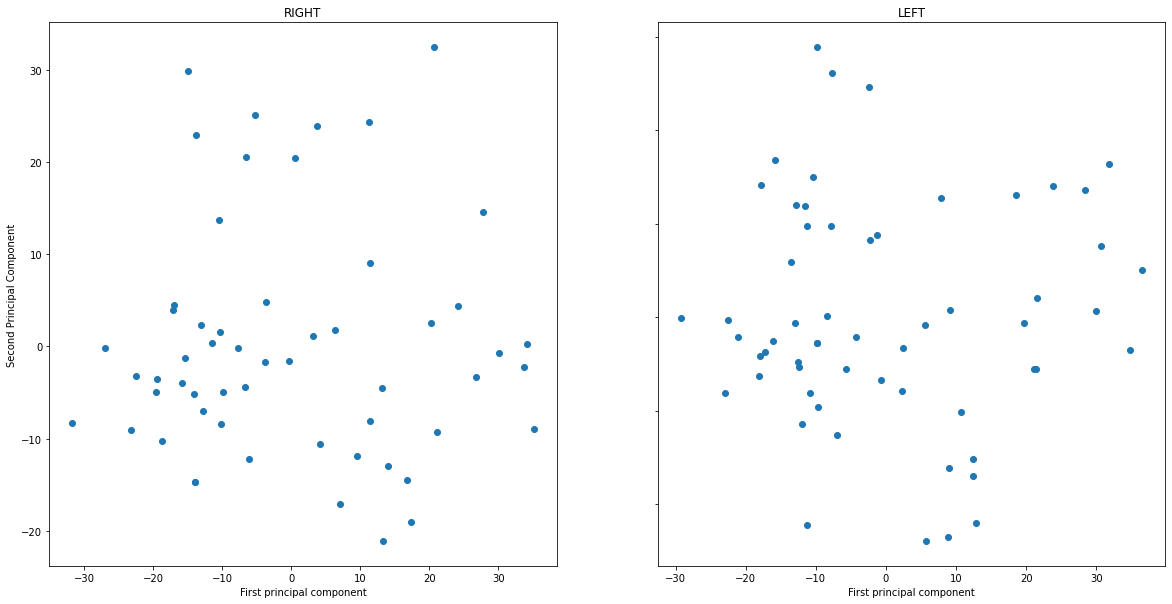

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].scatter(x_pca_r[:,0],x_pca_r[:,1])
axs[0].set_title('RIGHT')
axs[1].scatter(x_pca_l[:,0],x_pca_l[:,1])
axs[1].set_title('LEFT')
    
for ax in axs.flat:
    ax.set(xlabel='First principal component', ylabel='Second Principal Component')
        
for ax in axs.flat:
    ax.label_outer()

In [10]:
pca_r.components_

array([[-0.0397969 ,  0.02287275, -0.03622958, ..., -0.02972755,
        -0.02713879, -0.02342048],
       [-0.01692648,  0.01487892,  0.03345849, ...,  0.00832972,
        -0.06482312, -0.02696109],
       [-0.01582768,  0.01159905, -0.02244923, ...,  0.03325032,
         0.01779461,  0.06647193],
       ...,
       [-0.04924668,  0.05667381,  0.04866374, ...,  0.04116327,
         0.00478847, -0.03210611],
       [ 0.01063188,  0.02204514,  0.01812515, ..., -0.01762534,
        -0.00895535, -0.0032763 ],
       [ 0.03633236,  0.02892601,  0.00343119, ...,  0.04379256,
         0.00622441, -0.00405764]])

In [11]:
path = f'cut_one_gait_cycle_left'
filelist =[]
digits =[]
digits_int =[]
for file in glob.glob(f'{path}\\*.c3d',recursive = True):
    filelist.append(file[4:-4].replace("_", ""))
    digits.append(file[24:-9])

for ele in digits:
    digits_int.append(1) if ele=='degeneration' else digits_int.append(0)  

In [12]:
# plt.figure(figsize=(10,10))
# plt.scatter(x_pca[:, 0], x_pca[:, 1],
#             c=digits_int, edgecolor='none', alpha=0.8,
#             cmap=plt.cm.get_cmap("Spectral", 2), s=56)
# plt.xlabel('component 1')
# plt.ylabel('component 2')
# plt.title("Principal Component Analysis of Human GAIT",fontsize=20)
# targets = ['degeneration', 'healthy']
# plt.colorbar();

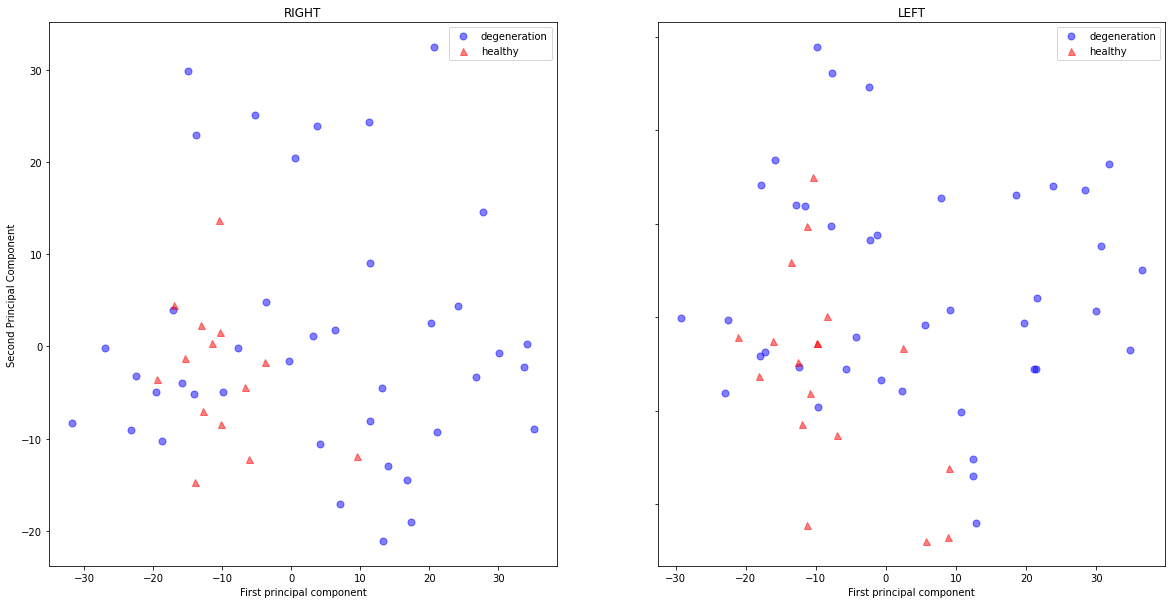

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].plot(x_pca_r[0:40,0],x_pca_r[0:40,1], 'o', markersize=7, color='blue', alpha=0.5, label='degeneration')
axs[0].plot(x_pca_r[41:55,0], x_pca_r[41:55,1], '^', markersize=7, color='red', alpha=0.5, label='healthy')
axs[0].legend()
axs[0].set_title('RIGHT')
axs[1].plot(x_pca_l[0:40,0],x_pca_l[0:40,1], 'o', markersize=7, color='blue', alpha=0.5, label='degeneration')
axs[1].plot(x_pca_l[41:59,0], x_pca_l[41:59,1], '^', markersize=7, color='red', alpha=0.5, label='healthy')
axs[1].legend()
axs[1].set_title('LEFT')

for ax in axs.flat:
    ax.set(xlabel='First principal component', ylabel='Second Principal Component')
        
for ax in axs.flat:
    ax.label_outer()

In [14]:
# plt.figure(figsize=(10,10))
# plt.plot(x_pca[0:36,0],x_pca[0:36,1], 'o', markersize=7, color='blue', alpha=0.5, label='degeneration')
# plt.plot(x_pca[37:56,0], x_pca[37:56,1], '^', markersize=7, color='red', alpha=0.5, label='healthy')
# plt.title("Principal Component Analysis of Human GAIT",fontsize=20)
# plt.legend()

In [15]:
features = ['jrd', 'jra', 'meanH', 'stdH', 'skewH', 'meanV', 'stdV']
features

['jrd', 'jra', 'meanH', 'stdH', 'skewH', 'meanV', 'stdV']

<AxesSubplot:>

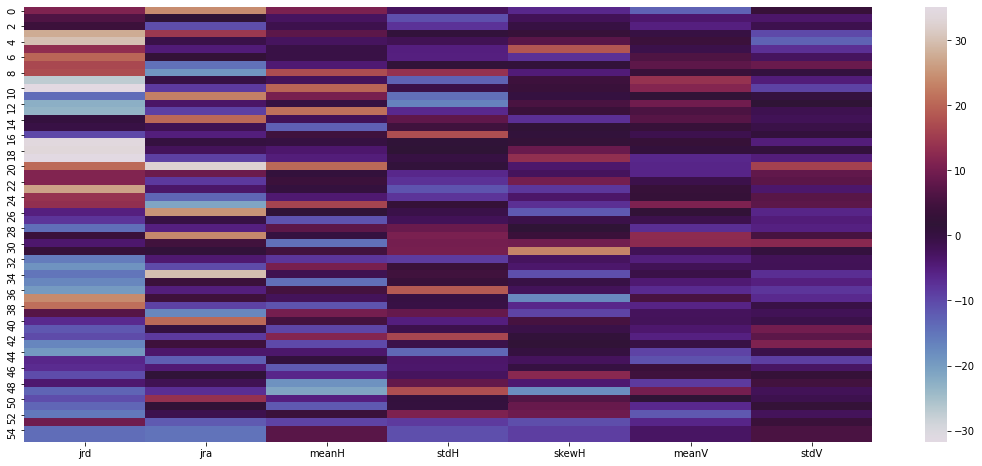

In [16]:
map= pd.DataFrame(x_pca_r,columns=features)
plt.figure(figsize=(19,8))
sns.heatmap(map,cmap='twilight')

<AxesSubplot:>

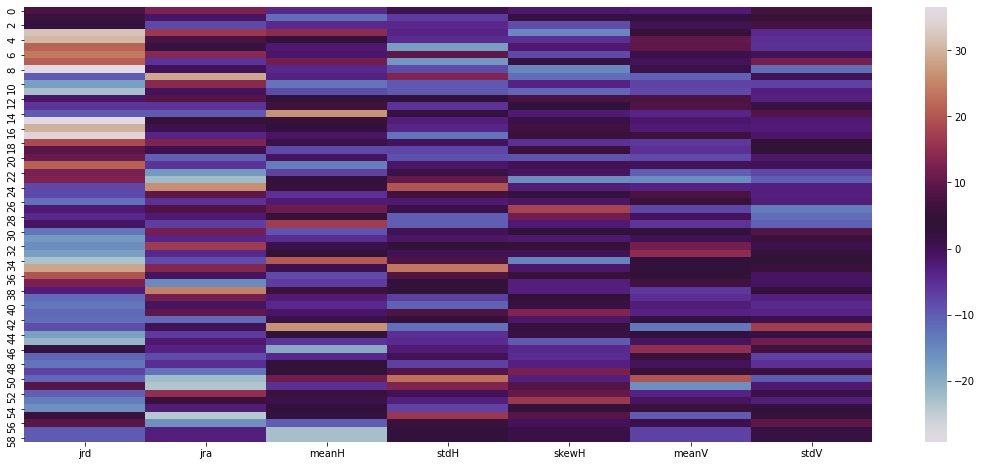

In [17]:
map= pd.DataFrame(x_pca_l,columns=features)
plt.figure(figsize=(19,8))
sns.heatmap(map,cmap='twilight')

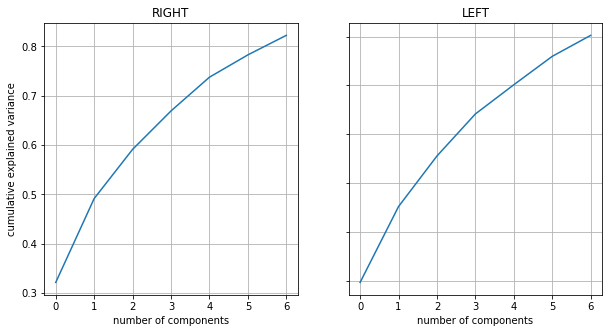

In [18]:
explained_variance_r = pca_r.explained_variance_ratio_
explained_variance_l = pca_l.explained_variance_ratio_

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].plot(np.cumsum(explained_variance_r))
axs[0].grid()
axs[0].set_title('RIGHT')
axs[1].plot(np.cumsum(explained_variance_l))
axs[1].grid()
axs[1].set_title('LEFT')

for ax in axs.flat:
    ax.set(xlabel='number of components', ylabel='cumulative explained variance')
        
for ax in axs.flat:
    ax.label_outer()

In [19]:
print ( "Components = ", pca_r.n_components_ , ";\nTotal explained variances right/left = ",
      (explained_variance_r), (explained_variance_l)  )

Components =  7 ;
Total explained variances right/left =  [0.32139372 0.17011458 0.09972502 0.07793961 0.06839361 0.04526416
 0.03958   ] [0.29760286 0.15501998 0.10329444 0.0858819  0.05966519 0.05804163
 0.04287509]
